# Question 1 Company Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [7]:
company=pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
label_encoder=preprocessing.LabelEncoder()
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,0,50,12,Yes,Yes


In [13]:
x=company.iloc[:,0:6]
y=company.iloc[:,6]
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

C 5.0 ( Using Entropy)

In [28]:
model_entropy_1=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

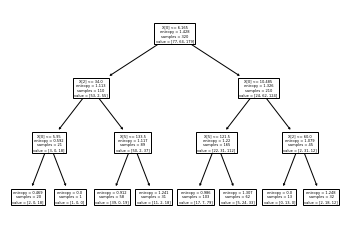

In [29]:
tree.plot_tree(model_entropy_1);

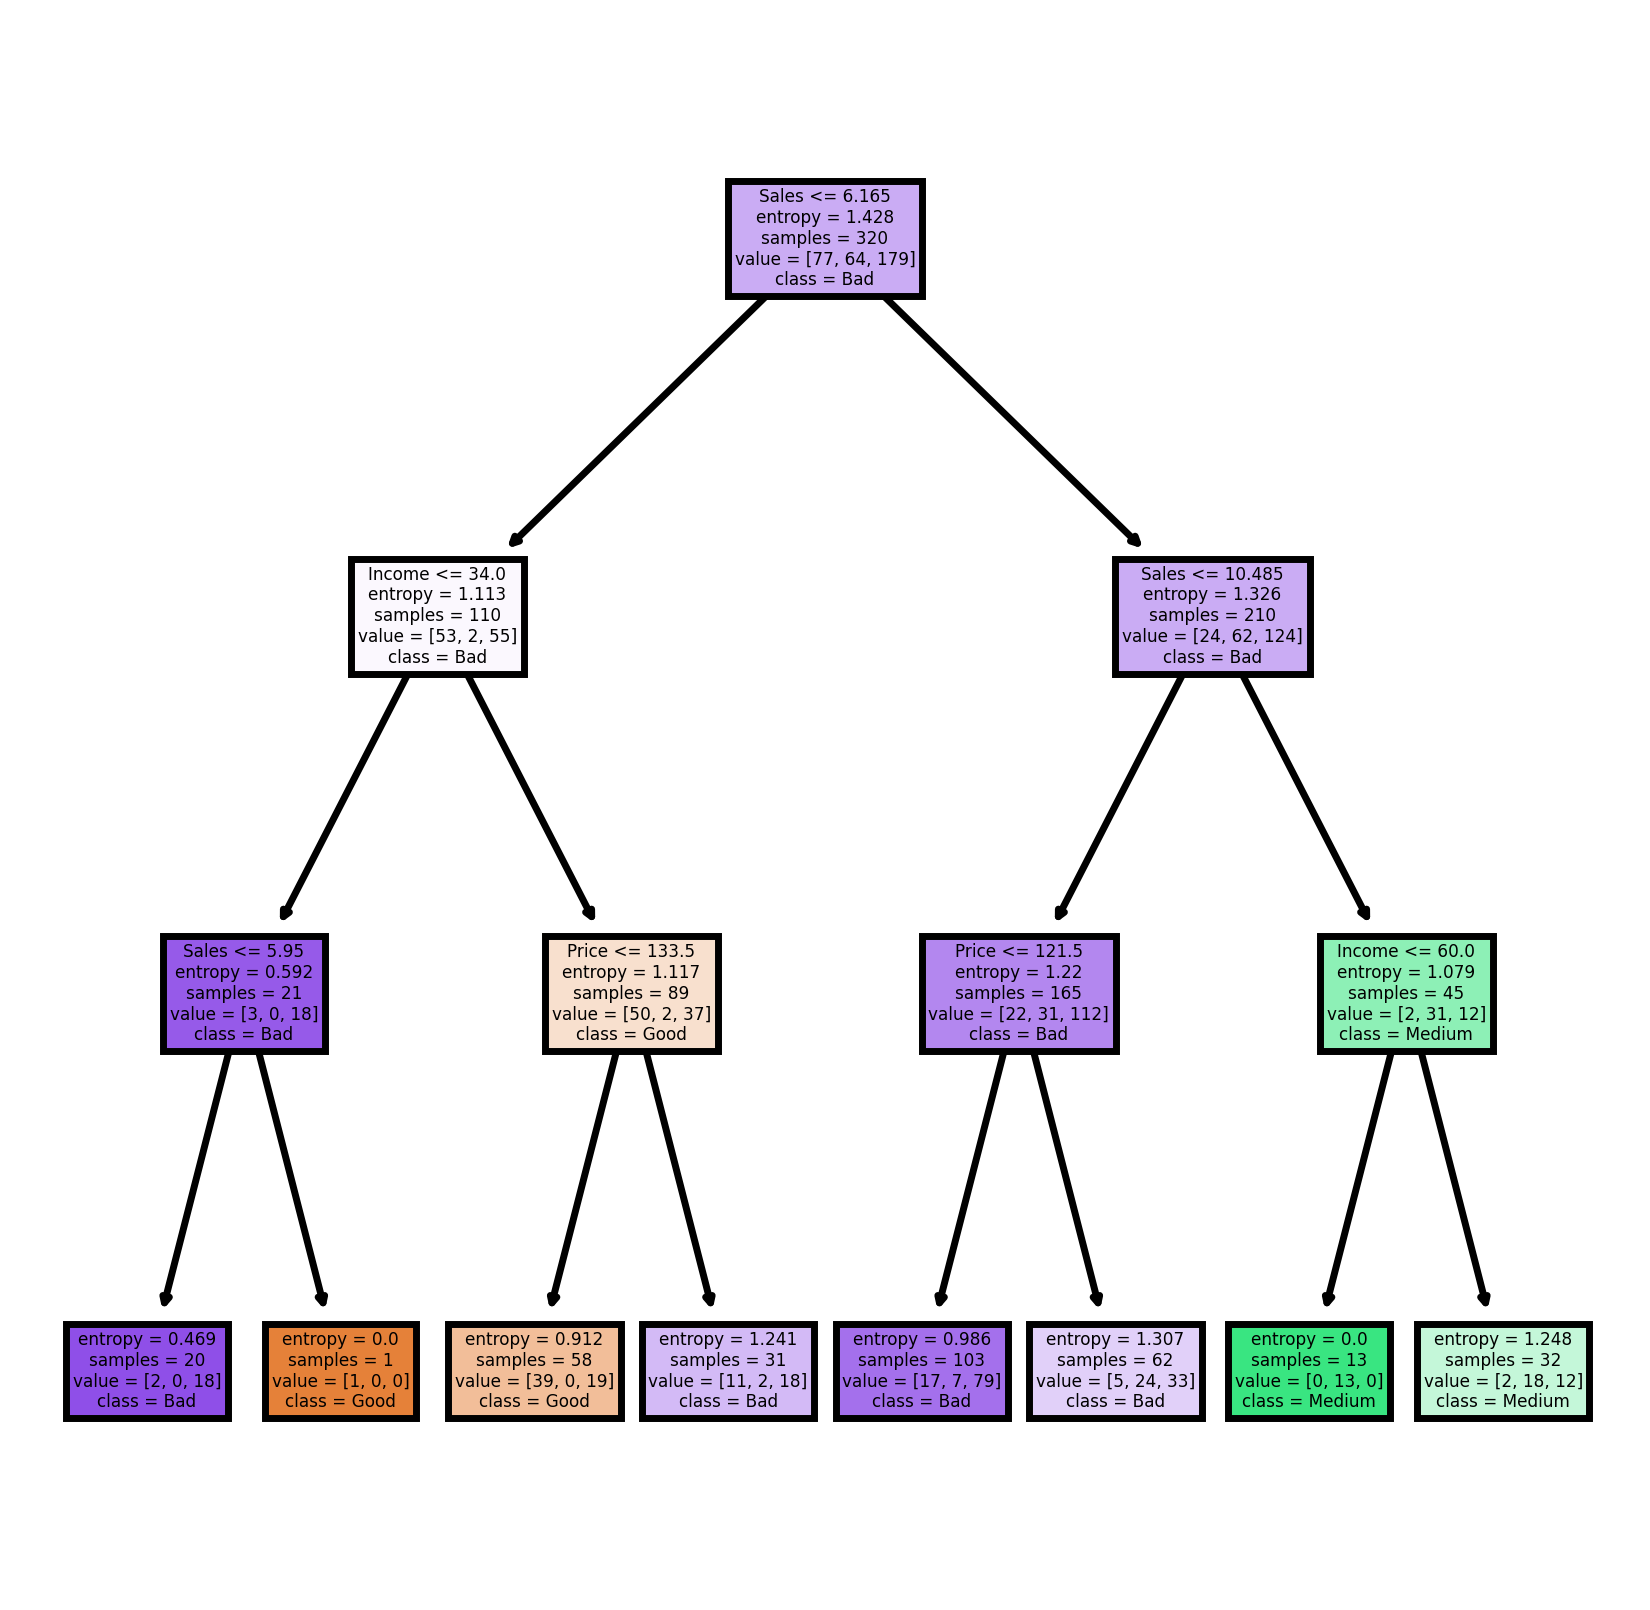

In [30]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['Good','Medium','Bad']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=500)
tree.plot_tree(model_entropy_1,feature_names=fn,class_names=cn,filled=True);

In [31]:
model_entropy_1.feature_importances_

array([0.65629732, 0.        , 0.14363525, 0.        , 0.        ,
       0.20006744])

In [32]:
preds=model_entropy_1.predict(x_test)
pd.Series(preds).value_counts()

2    49
1    17
0    14
dtype: int64

In [33]:
pd.crosstab(y_test,preds)

col_0,0,1,2
ShelveLoc,,,
0,4,1,14
1,0,13,8
2,10,3,27


In [34]:
np.mean(preds==y_test)

0.55

CART Decision Tree

In [35]:
model_gini_1=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [36]:
model_gini_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
pred=model_gini_1.predict(x_test)

In [38]:
np.mean(pred==y_test)

0.6

In [39]:
model_gini_1.feature_importances_

array([0.63438772, 0.        , 0.20771036, 0.        , 0.        ,
       0.15790192])

Regression Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
x=company.iloc[:,0:6]
y=company.iloc[:,6]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [43]:
model_r_1=DecisionTreeRegressor(max_depth=3)
model_r_1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [44]:
model_r_1.score(x_test,y_test)

-0.11407386821057641

# Question 2 Fraud Check

In [130]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [131]:
fraud=pd.get_dummies(fraud,columns=['Undergrad'], drop_first=True)
fraud=pd.get_dummies(fraud,columns=['Marital.Status'], drop_first=True)
fraud=pd.get_dummies(fraud,columns=['Urban'], drop_first=True)
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [132]:
fraud["TaxStatus"] = pd.cut(fraud["Taxable.Income"], bins = [0,30000,1000000], labels = ["Risky", "Good"])
fraud.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxStatus
590,43018,85195,14,0,1,0,1,Good
591,27394,132859,18,1,0,1,1,Risky
592,68152,75143,16,1,0,1,0,Good
593,84775,131963,10,0,0,0,1,Good
594,47364,97526,9,0,1,0,1,Good
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good
599,96519,158137,16,0,0,0,0,Good


In [133]:
fraud=fraud.iloc[:,1:]
fraud

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxStatus
0,50047,10,0,0,1,1,Good
1,134075,18,1,0,0,1,Good
2,160205,30,0,1,0,1,Good
3,193264,15,1,0,1,1,Good
4,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,Good
596,55369,2,1,0,0,1,Good
597,154058,0,0,0,0,1,Good
598,180083,17,1,1,0,0,Good


In [135]:
fraud=pd.get_dummies(fraud,columns=['TaxStatus'], drop_first=True)
fraud

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxStatus_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [161]:
X = fraud.drop(['TaxStatus_Good'], axis=1)
Y= fraud['TaxStatus_Good']

In [181]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=40)

C 5.0 Entropy

In [182]:
model_entropy_2=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy_2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

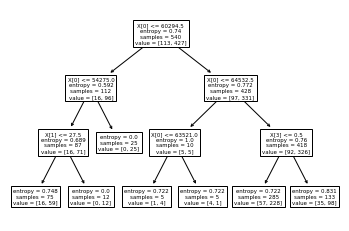

In [183]:
tree.plot_tree(model_entropy_2);

In [184]:
columnName = list(fraud.columns)
columnName

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxStatus_Good']

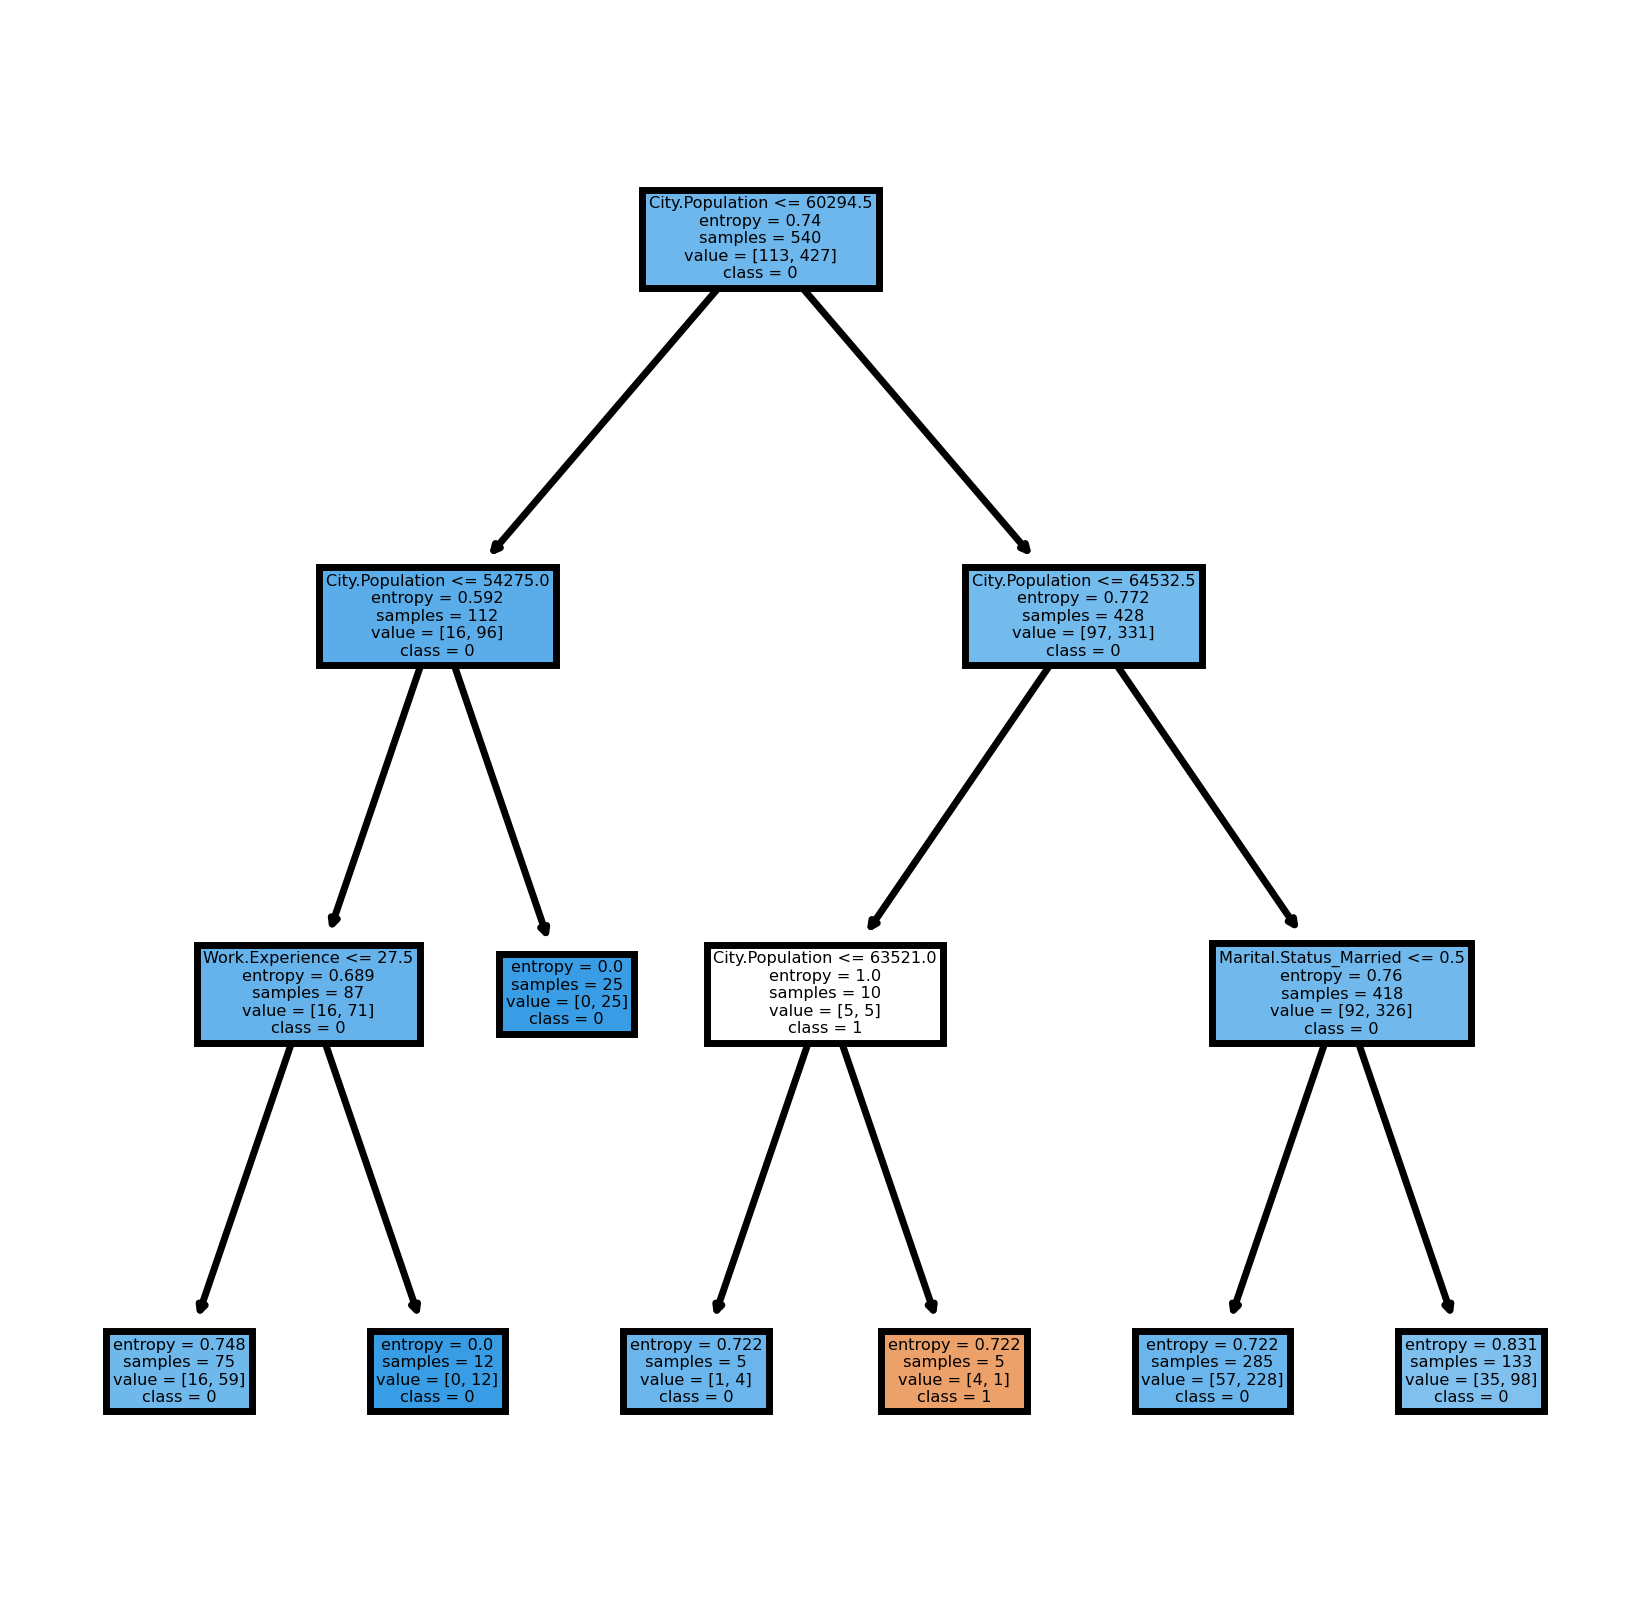

In [185]:
FN=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
CN=['1','0']  # 1 for Good , 0 for Risky
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=500)
tree.plot_tree(model_entropy_2,feature_names=FN,class_names=CN,filled=True);

In [186]:
model_entropy_2.feature_importances_

array([0.73462575, 0.19098173, 0.        , 0.07439252, 0.        ,
       0.        ])

In [187]:
Pred=model_entropy_2.predict(X_test)
pd.Series(preds).value_counts()

Good    150
dtype: int64

In [188]:
Pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [170]:
pd.crosstab(Y_test,Pred)

col_0,1
TaxStatus_Good,
0,34
1,116


In [171]:
np.mean(Pred==Y_test)

0.7733333333333333

CART Decision Tree

In [172]:
model_gini_2=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [173]:
model_gini_2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [174]:
Preds=model_gini_2.predict(X_test)

In [175]:
np.mean(Preds==Y_test)

0.7733333333333333

In [176]:
model_gini_2.feature_importances_

array([0.57219327, 0.19101844, 0.        , 0.18599475, 0.        ,
       0.05079354])

Decission Tree Regression

In [177]:
X = fraud.drop(['TaxStatus_Good'], axis=1)
Y = fraud['TaxStatus_Good']

In [178]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=42)

In [179]:
model_r_2=DecisionTreeRegressor(max_depth=3)
model_r_2.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

In [180]:
model_r_2.score(X_test,Y_test)

-0.047494864919759294